# Bayes classifier-Unimodal Gaussian density 

## Full covariance matrix for all the classes and is same for all the classes 

1. Same covariance matrix for all the classes may be obtained by taking 
average of covariance matrices of all the classes 
2. Same covariance matrix for all the classes by computing the 
covariance matrix of training data of all the classes combined. 

## 1st approach - Covariance matrix calculated by taking average of covariance matrices of all classes

In [2]:
import numpy as np

# Load dataset from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Features
    y = data[:, 2]   # Class labels
    return X, y

# Calculate mean vectors and covariance matrix
def compute_class_statistics(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    
    for cls in classes:
        X_cls = X[y == cls]
        if X_cls.shape[0] > 1:  # Ensure at least two samples to compute covariance
            means[cls] = np.mean(X_cls, axis=0)
            covariances[cls] = np.cov(X_cls, rowvar=False)
        else:
            print(f"Warning: Class {cls} has insufficient data.")
            means[cls] = np.mean(X_cls, axis=0) if X_cls.shape[0] > 0 else np.zeros(X.shape[1])
            covariances[cls] = np.eye(X.shape[1])  # Use identity as fallback for covariance

    # Average covariance matrix
    avg_covariance = np.mean([cov for cov in covariances.values() if cov.shape[0] > 0], axis=0)
    
    return means, avg_covariance

# Check data per class
def check_data_per_class(X, y):
    unique_classes, counts = np.unique(y, return_counts=True)
    for cls, count in zip(unique_classes, counts):
        print(f"Class {int(cls)} has {count} samples.")
    return counts

# Run check on your training data
check_data_per_class(X_train, y_train)


# Gaussian density function for a given class
def gaussian_density(x, mean, covariance):
    d = len(mean)
    diff = x - mean
    inv_cov = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot(diff.T, np.dot(inv_cov, diff))
    return np.exp(exponent) / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))

# Predict class label for each sample in X
def predict(X, means, covariance):
    predictions = []
    for x in X:
        probs = {}
        for cls, mean in means.items():
            probs[cls] = gaussian_density(x, mean, covariance)
        predictions.append(max(probs, key=probs.get))
    return np.array(predictions)

# Evaluate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Load data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt')

# Compute class statistics and shared covariance matrix
means, shared_covariance = compute_class_statistics(X_train, y_train)

# Predict on test and validation data
y_test_pred = predict(X_test, means, shared_covariance)
y_val_pred = predict(X_val, means, shared_covariance)

# Calculate accuracy
test_accuracy = accuracy(y_test, y_test_pred)
val_accuracy = accuracy(y_val, y_val_pred)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Class 1 has 150 samples.
Class 2 has 600 samples.
Test Accuracy: 51.67%
Validation Accuracy: 50.22%


#### Decision region plot for all the classes together with the training data superposed 

C:\Users\raksh\AppData\Local\Temp\ipykernel_15628\3288392872.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1], c=cmap_bold(idx), label=f"Class {int(cls)}", edgecolor="k", s=40)


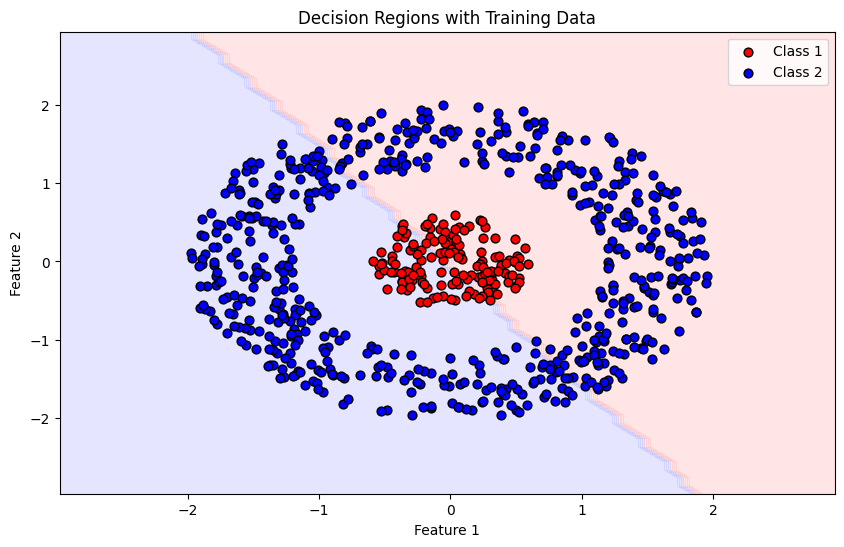

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'means', 'shared_covariance', and 'predict' are defined as in the previous code

# Create a mesh grid based on feature ranges
def create_meshgrid(X, h=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Predict function adapted for mesh grid points
def predict_meshgrid(xx, yy, means, shared_covariance):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(grid_points, means, shared_covariance)
    return predictions.reshape(xx.shape)

# Plot decision regions and training data
def plot_decision_regions(X, y, means, shared_covariance):
    xx, yy = create_meshgrid(X)
    Z = predict_meshgrid(xx, yy, means, shared_covariance)

    # Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Plot decision boundary and regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot training points with different colors for each class
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], c=cmap_bold(idx), label=f"Class {int(cls)}", edgecolor="k", s=40)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Regions with Training Data")
    plt.legend()
    plt.show()


# Plot decision regions with training data
plot_decision_regions(X_train, y_train, means, shared_covariance)


#### Decision region plot for all the classes together with the testing data superimposed

C:\Users\raksh\AppData\Local\Temp\ipykernel_15628\2286384983.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1], c=cmap_bold(idx), label=f"Class {int(cls)}", edgecolor="k", s=40)


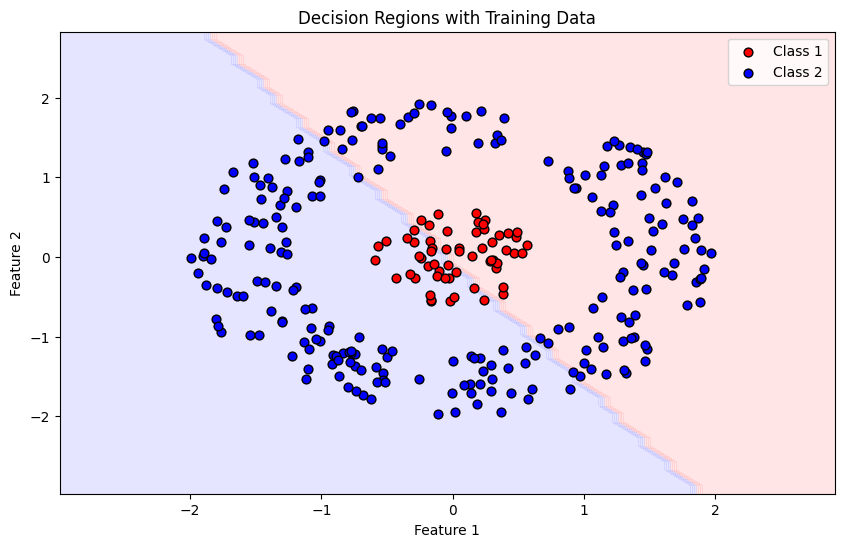

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'means', 'shared_covariance', and 'predict' are defined as in the previous code

# Create a mesh grid based on feature ranges
def create_meshgrid(X, h=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Predict function adapted for mesh grid points
def predict_meshgrid(xx, yy, means, shared_covariance):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(grid_points, means, shared_covariance)
    return predictions.reshape(xx.shape)

# Plot decision regions and training data
def plot_decision_regions(X, y, means, shared_covariance):
    xx, yy = create_meshgrid(X)
    Z = predict_meshgrid(xx, yy, means, shared_covariance)

    # Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Plot decision boundary and regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot training points with different colors for each class
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], c=cmap_bold(idx), label=f"Class {int(cls)}", edgecolor="k", s=40)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Regions with Training Data")
    plt.legend()
    plt.show()

# Plot decision regions with training data
plot_decision_regions(X_test, y_test, means, shared_covariance)


### Evaluation metrics

### Classification accuracy, precision for every class, mean precision, recall for every class, mean recall, F-measure for every class and mean F-measure on test data 

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F-measure for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Calculate mean precision, mean recall, and mean F-measure
mean_precision = precision_score(y_test, y_pred, average='macro')
mean_recall = recall_score(y_test, y_pred, average='macro')
mean_f1 = f1_score(y_test, y_pred, average='macro')

# Get unique class labels
classes = np.unique(y_test)

# Print results for each class
for i, cls in enumerate(classes):
    print(f"Class {int(cls)}:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-Score: {f1_per_class[i]:.4f}")

# Print mean precision, mean recall, and mean F-measure
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Classification Accuracy: 0.5167
Class 1:
  Precision: 0.2109
  Recall: 0.5167
  F1-Score: 0.2995
Class 2:
  Precision: 0.8105
  Recall: 0.5167
  F1-Score: 0.6310
Mean Precision: 0.5107
Mean Recall: 0.5167
Mean F1-Score: 0.4653


### Confusion matrix

Confusion matrix based on the performance for test data. The entries in confusion 
matrix must be made in percentage. 

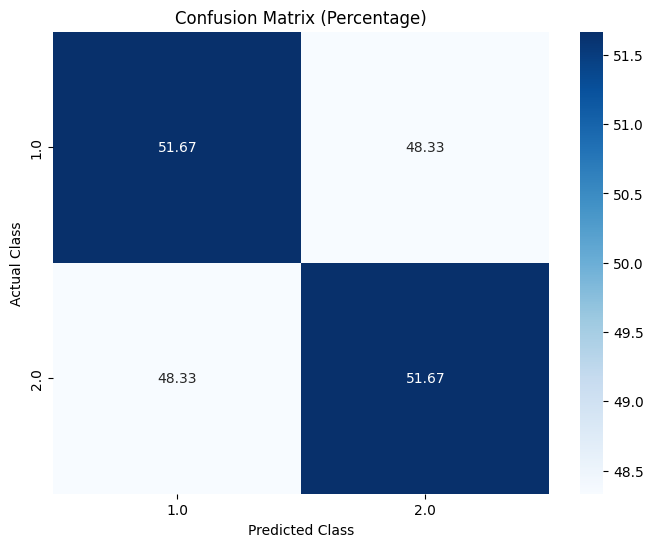

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = predict(X_test, means, shared_covariance)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix (Percentage)")
plt.show()


## 2nd Approach covariance matrix for all the classes by computing the covariance matrix of training data of all the classes combined.

In [14]:
import numpy as np

# Step 1: Load the dataset
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # First two columns as features
    y = data[:, 2]   # Third column as class label
    return X, y

# Load train, test, and validation datasets
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt')

# Step 2: Compute shared covariance matrix on training data
cov_matrix = np.cov(X_train, rowvar=False)

# Step 3: Calculate class-wise means
classes = np.unique(y_train)
class_means = {}
for cls in classes:
    class_means[cls] = X_train[y_train == cls].mean(axis=0)

# Step 4: Define Gaussian density function
def gaussian_density(x, mean, cov):
    d = mean.shape[0]
    cov_inv = np.linalg.inv(cov)
    norm_const = 1.0 / (np.sqrt((2 * np.pi) ** d * np.linalg.det(cov)))
    x_minus_mu = x - mean
    result = np.exp(-0.5 * x_minus_mu.T @ cov_inv @ x_minus_mu)
    return norm_const * result

# Step 5: Predict class labels
def predict(X):
    predictions = []
    for x in X:
        # Calculate likelihood for each class
        class_likelihoods = {cls: gaussian_density(x, class_means[cls], cov_matrix) for cls in classes}
        # Choose the class with the highest likelihood
        predictions.append(max(class_likelihoods, key=class_likelihoods.get))
    return np.array(predictions)

# Step 6: Evaluate accuracy
y_pred_train = predict(X_train)
y_pred_test = predict(X_test)
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 52.93%
Test Accuracy: 51.67%


C:\Users\raksh\AppData\Local\Temp\ipykernel_15628\2253004181.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1],


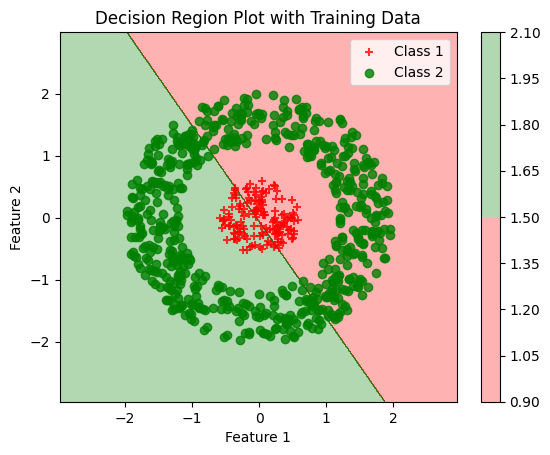

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define function for plotting decision regions
def plot_decision_regions(X, y, means, cov_matrix, resolution=0.01):
    # Set up marker generator and color map
    markers = ('+', 'o')
    colors = ('red', 'green')
    cmap = ListedColormap(colors)

    # Generate a grid of points with a fixed step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten the grid arrays to pass them as samples to the classifier
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision surface
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.colorbar()
    
    # Plot the training samples with class labels
    for idx, cls in enumerate(classes):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f'Class {int(cls)}')

    # Set plot limits and labels
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right')
    plt.title('Decision Region Plot with Training Data')
    plt.show()

# Plot decision regions for the training data
plot_decision_regions(X_train, y_train, class_means, cov_matrix)


### Decision region plot for all the classes together with the testing data superimposed

C:\Users\raksh\AppData\Local\Temp\ipykernel_15628\1083666235.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1],


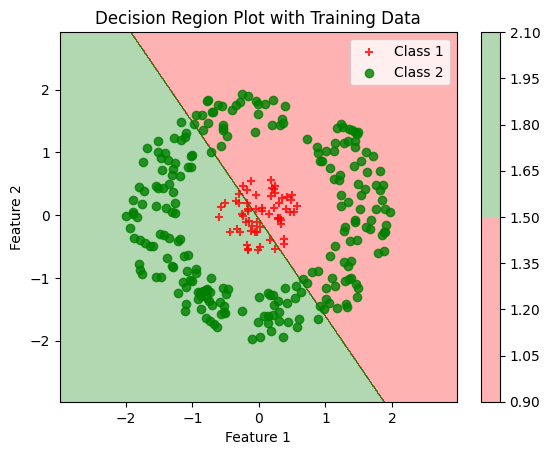

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define function for plotting decision regions
def plot_decision_regions(X, y, means, cov_matrix, resolution=0.01):
    # Set up marker generator and color map
    markers = ('+', 'o')
    colors = ('red', 'green')
    cmap = ListedColormap(colors)

    # Generate a grid of points with a fixed step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten the grid arrays to pass them as samples to the classifier
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision surface
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.colorbar()
    
    # Plot the training samples with class labels
    for idx, cls in enumerate(classes):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f'Class {int(cls)}')

    # Set plot limits and labels
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right')
    plt.title('Decision Region Plot with Training Data')
    plt.show()

# Plot decision regions for the test data
plot_decision_regions(X_test, y_test, class_means, cov_matrix)


### Evaluation metrics 
#### Classification accuracy, precision for every class, mean precision, recall for every class, mean recall, F-measure for every class and mean F-measure on test data 

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Predict on test data
y_pred_test = predict(X_test)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Generate classification report for precision, recall, and F1 score for each class
report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

# Display the classification report
print("Classification Report on Test Data")
print(report_df)

# Calculate mean precision, recall, and F1-score across all classes
mean_precision = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
mean_recall = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
mean_f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

# Create a summary table including accuracy, mean precision, mean recall, and mean F1-score
summary = {
    'Metric': ['Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1-Score'],
    'Score': [accuracy, mean_precision, mean_recall, mean_f1]
}
summary_df = pd.DataFrame(summary)

print("\nSummary Metrics")
print(summary_df)


Classification Report on Test Data
              precision    recall  f1-score     support
1.0            0.210884  0.516667  0.299517   60.000000
2.0            0.810458  0.516667  0.631043  240.000000
accuracy       0.516667  0.516667  0.516667    0.516667
macro avg      0.510671  0.516667  0.465280  300.000000
weighted avg   0.690543  0.516667  0.564738  300.000000

Summary Metrics
           Metric     Score
0        Accuracy  0.516667
1  Mean Precision  0.510671
2     Mean Recall  0.516667
3   Mean F1-Score  0.465280


### Covariance Matrix

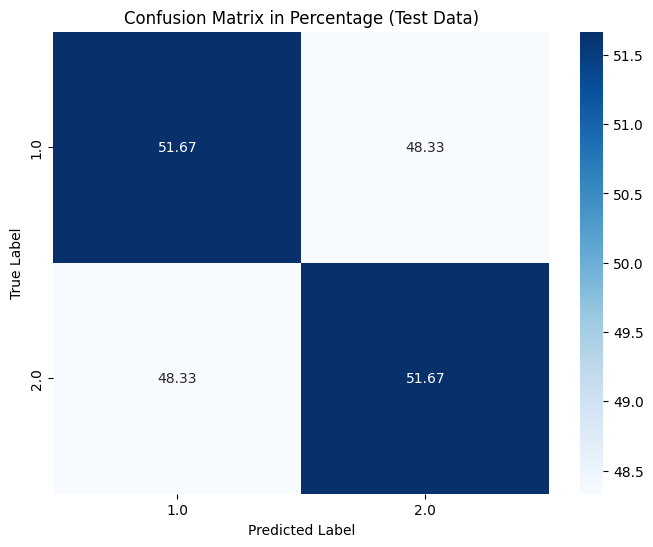

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Convert the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix in Percentage (Test Data)")
plt.show()
